# UMAP as dimension reduction technique

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd

## Loading embeddings

In [4]:
import os
import pickle

#seed_name = "hair_dryer"
seed_name = "video_codec"
#seed_name = "diesel"

src_dir = "."
        
with open(src_dir + "/data/" + seed_name + "/average_word_embedding.pkl", 'rb') as infile:     
    average_word = pickle.load(infile)
        
df = pd.read_json('../demo/data/' + seed_name + '.json')
df["ExpansionLevel"] = "Seed"

In [5]:
import umap

umap_reducer = umap.UMAP(random_state=42)

In [6]:
%%time
from fiz_lernmodule.visualization_landscaping import EmbeddingVisualizer

umap_visualizer = EmbeddingVisualizer(umap_reducer, average_word, df)

Fit  UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
   learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
   metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
   n_neighbors=15, negative_sample_rate=5, random_state=42,
   repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
   target_metric='categorical', target_metric_kwds=None,
   target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
   transform_seed=42, verbose=False)


C:\Users\tskripnikova\Anaconda3\envs\vis_emb\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


EmbeddingVisualizer initialized
Wall time: 7.71 s


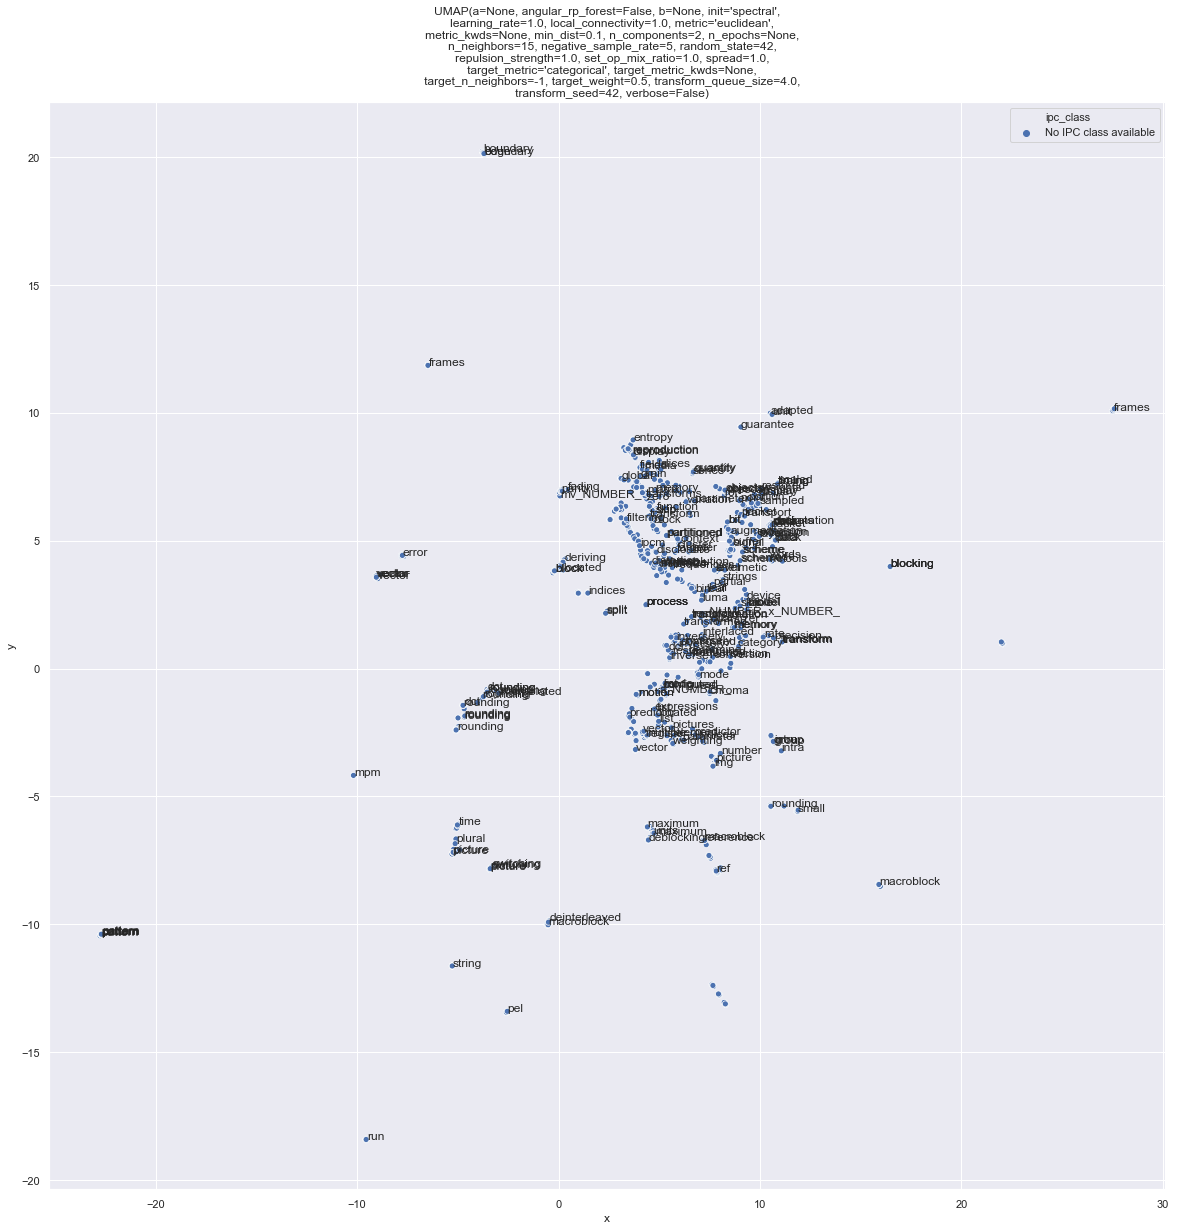

In [7]:
if seed_name == "hair_dryer":
    umap_visualizer.plot_embeddings(detailed=True, label=True, density=1, terms=1)
elif seed_name == "video_codec":
    umap_visualizer.plot_embeddings(detailed=True, label=True, density=7, terms=1)
else:
    umap_visualizer.plot_embeddings(detailed=True, label=True, density=10, terms=1)

In [8]:
from sklearn.manifold import TSNE

tsne300 = TSNE(metric='euclidean')

In [9]:
%%time
tsne_visualizer = EmbeddingVisualizer(tsne300, average_word, df)

Fit  TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)
EmbeddingVisualizer initialized
Wall time: 10.2 s


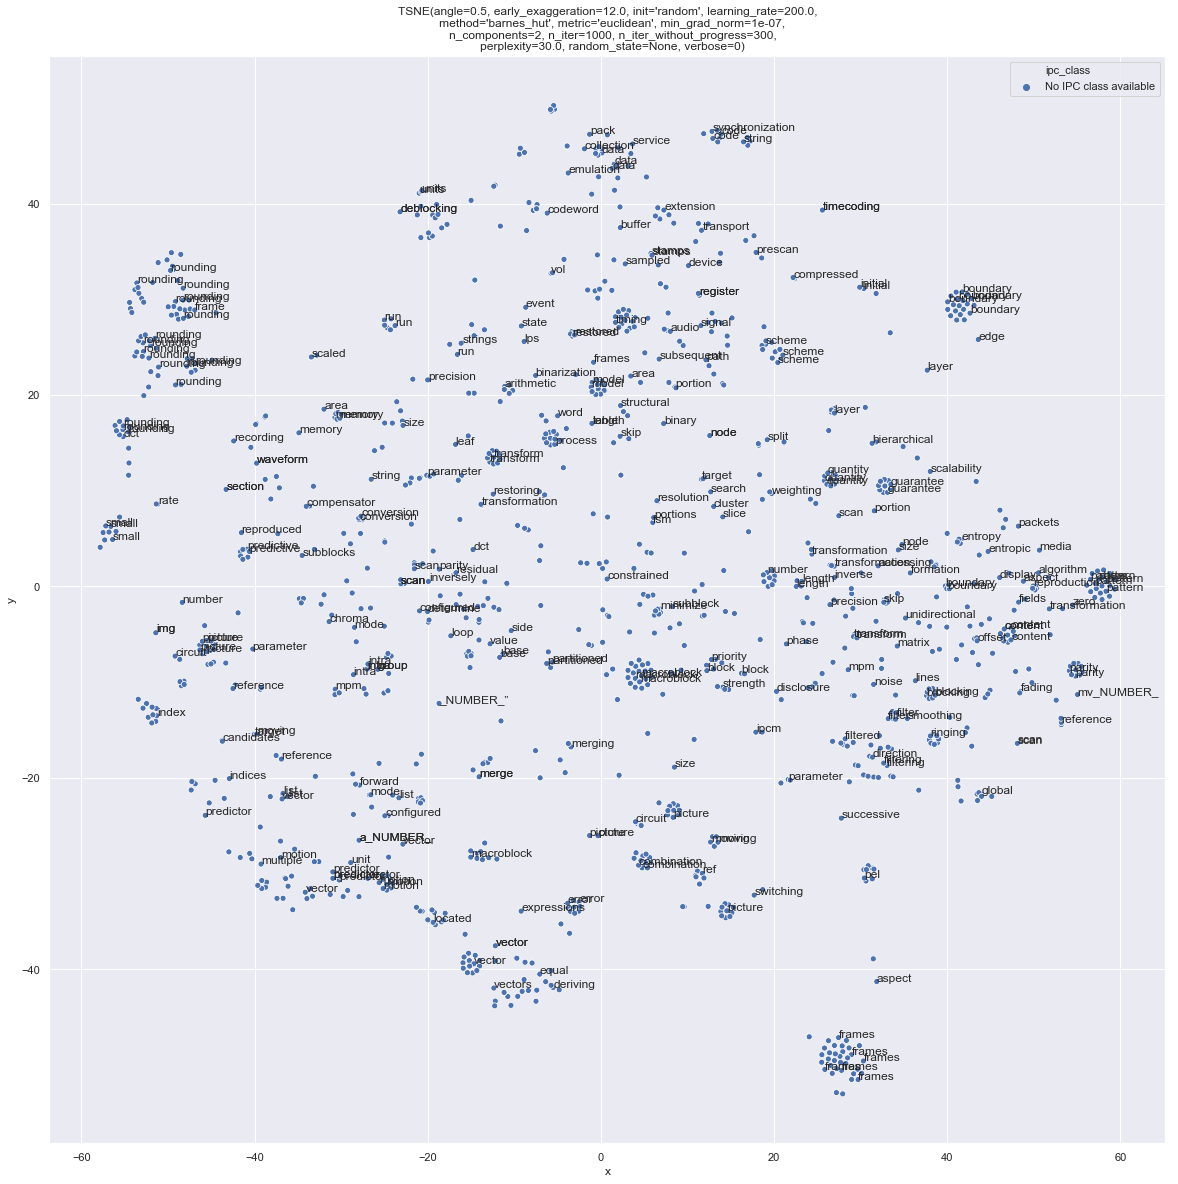

In [10]:
if seed_name == "hair_dryer":
    tsne_visualizer.plot_embeddings(detailed=True, label=True, density=1, terms=1)
elif seed_name == "video_codec":
    tsne_visualizer.plot_embeddings(detailed=True, label=True, density=5, terms=1)
else:
    tsne_visualizer.plot_embeddings(detailed=True, label=True, density=9, terms=1)